In [114]:
import numpy as np
from numpy import diag

def D(n):

    D=diag(-np.ones(n-1),0)+diag(np.ones(n-2),1)

    temp=np.zeros(n-1)

    #Expand the dims of temp
    temp = np.expand_dims(temp,1)

    #Stack zeros horizontally
    D=np.hstack((D, temp))

    D[n-2][n-1]=1

    return D

In [115]:
D(5)

array([[-1.,  1.,  0.,  0.,  0.],
       [ 0., -1.,  1.,  0.,  0.],
       [ 0.,  0., -1.,  1.,  0.],
       [ 0.,  0.,  0., -1.,  1.]])

In [116]:
def approx_derivative(f,x):

    n = len(x)
    h = abs(x[0]-x[n-1])/n

    return (D(n)@f)/h

In [117]:
x = np.linspace(0,4*np.pi,1000)

y=approx_derivative(np.sin(x),x) #  getting approx derivative of sin(x)


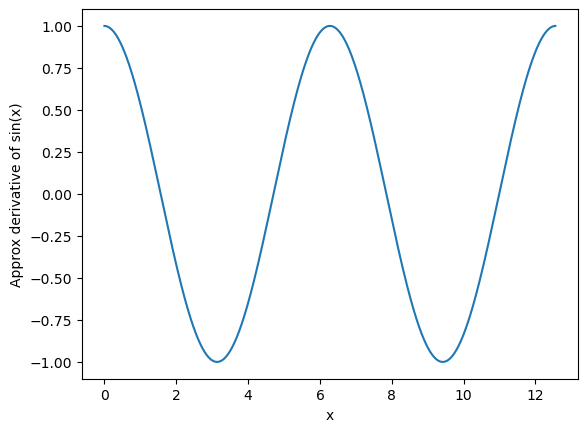

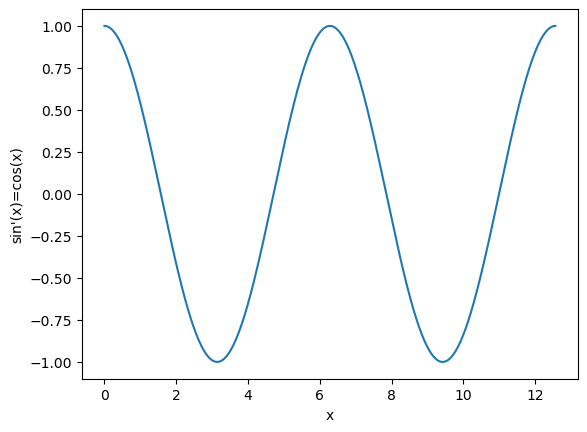

In [118]:
import matplotlib.pyplot as plt

x1=np.delete(x,-1,0)

plt.plot(x1,y)   # plotting the approx derivative of sin(x)
plt.xlabel('x')
plt.ylabel("Approx derivative of sin(x)")
plt.show()

plt.plot(x,np.cos(x)) # # plotting the exact derivative of sin(x) which is cos(x)
plt.xlabel('x')
plt.ylabel("sin'(x)=cos(x)")
plt.show()

We can see above, the approx derivative is almost identical to exact derivative

In [119]:
def f(x): return x**2 + 2*np.sin(10*x)

def g(x): return 2*x + 20*np.cos(10*x) # g(x)=f'(x)

y2=approx_derivative(f(x),x) #  getting approx derivative of f(x)

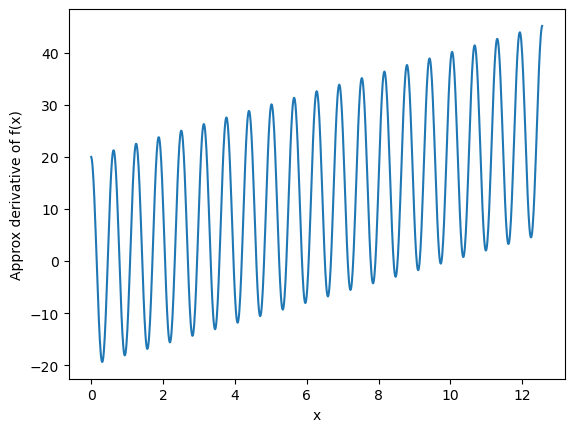

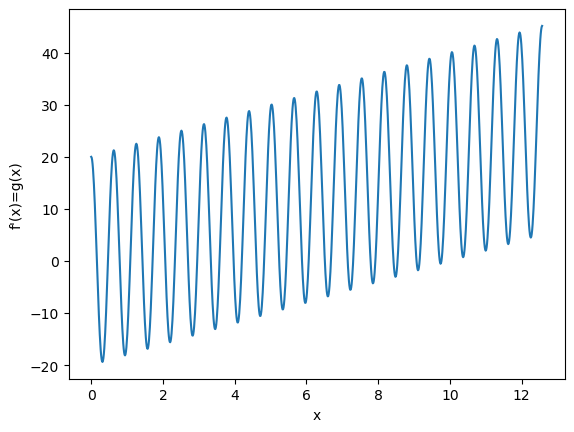

In [120]:
x2=np.delete(x,-1,0)

plt.plot(x2,y2)   # plotting the approx derivative of f(x)
plt.xlabel('x')
plt.ylabel("Approx derivative of f(x)")
plt.show()

plt.plot(x,g(x))   # plotting the exact derivative of f(x) which is g(x)
plt.xlabel('x')
plt.ylabel("f'(x)=g(x)")
plt.show()

In this case also, the approx derivative is almost identical to exact derivative

In [121]:
import numpy as np
from itertools import product

def mat(n,k):
    A=np.zeros((n,n))

    for i,j,t in product(range(n),range(n),range(k+1)):
        if abs(i-j)==t:
            A[i][j]=1 

    return A


def avg(n,k):    # creating the average matrix operator
    
    A=mat(n,k)

    for i in range(n):
        r = np.sum(A[i])
        A[i]=A[i]/r

    return A

In [122]:
f_avg=avg(1000,100)@f(x)
g_avg=avg(1000,100)@g(x)

In [123]:
y_avg_f=approx_derivative(f_avg,x) #  getting approx derivative of avg of f(x)
y_avg_g=approx_derivative(f_avg,x) #  getting approx derivative of avg of f(x)

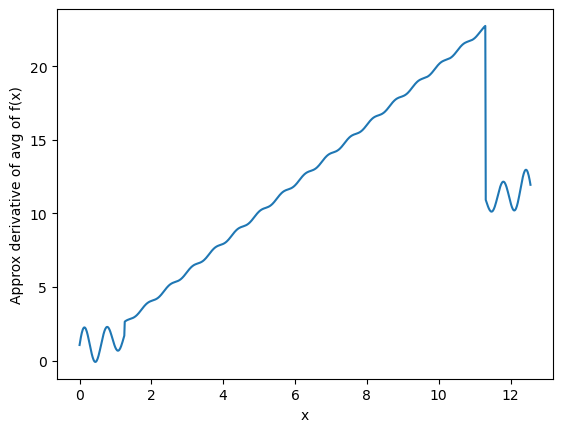

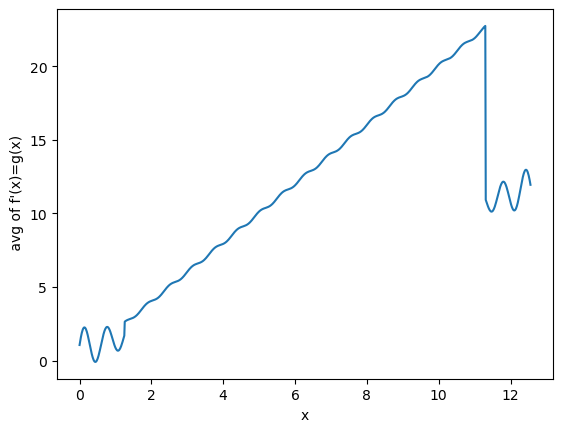

In [124]:
x3=np.delete(x,-1,0)

plt.plot(x3,y_avg_f)   # plotting the approx derivative of avg f(x)
plt.xlabel('x')
plt.ylabel("Approx derivative of avg of f(x)")
plt.show()

plt.plot(x3,y_avg_g)   # plotting avg of the exact derivative of f(x) which is g(x)
plt.xlabel('x')
plt.ylabel(" avg of f'(x)=g(x)")
plt.show()

In this case the graph smooths out with same result.